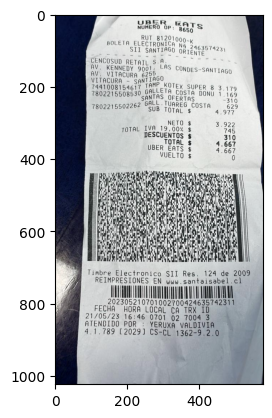

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from pprint import pprint
from pytesseract import Output

img = cv2.imread('../images/1c5e5931-8337-40bb-9ff6-3718b941c902.JPG')

plt.imshow(img)
plt.show()

## Grayscale

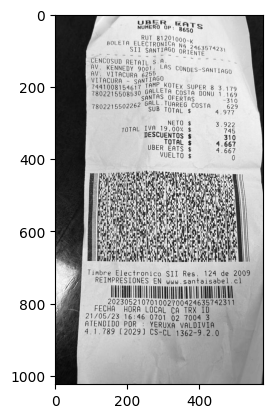

In [24]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

## Thresholding - separate the image into regions of interest

125.0


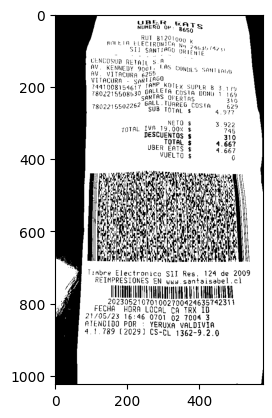

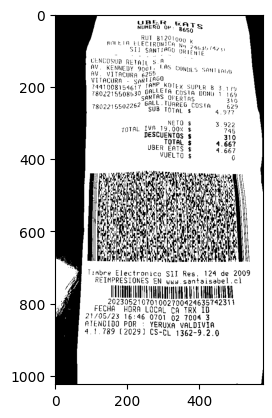

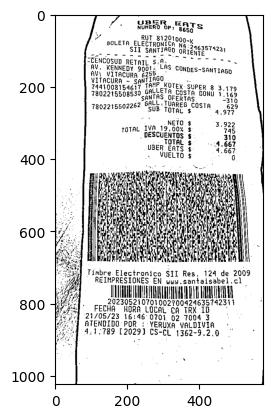

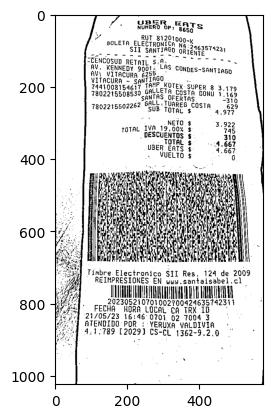

In [25]:

# otsu method -> to get the threshold value
# https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
otsu_value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(otsu_value)
plt.imshow(otsu, cmap='gray')
plt.show()

# normnal thresholding using the otsu value
value, thresh = cv2.threshold(gray, otsu_value, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()

# adaptive thresholding (mean)
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 11)
plt.imshow(adaptive_average, cmap='gray')
plt.show()

# gaussian adaptive thresholding
adaptive_gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 20)
plt.imshow(adaptive_average, cmap='gray')
plt.show()

## Color inversion
Make the background white and the text in black

[[226 225 225 ... 220 220 221]
 [226 225 225 ... 221 222 222]
 [226 225 225 ... 223 224 225]
 ...
 [246 245 244 ... 190 213 231]
 [246 245 244 ... 192 215 235]
 [245 245 243 ... 192 216 238]]


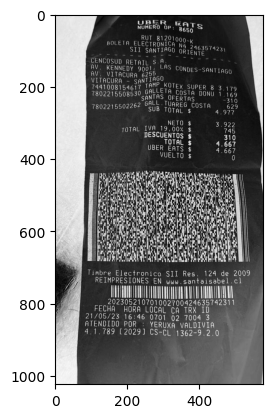

In [26]:
# in the case of the received image it isn't necessary to apply inversion because 
invert = 255 - gray
print(invert)

plt.imshow(invert, cmap='gray')
plt.show()


## Resizing
To increase or decrease the image

* INTER_NEAREST - a nearest neighbor interpolation. It is widely used because it is the fastest
* INTER_LINEAR - a bilinear interpolation (it's used by default), generally good for zooming in and out of images
* INTER_AREA - uses the pixel area ratio. May be a preferred method for image reduction as it provides good results
* INTER_CUBIC - bicubic (4x4 neighboring pixels). It has better results
* INTER_LANCZOS4 - Lanczos interpolation (8x8 neighboring pixels). Among these algorithms, it is the one with the best quality results.


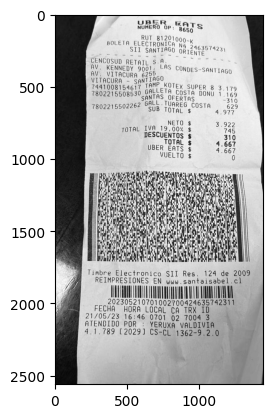

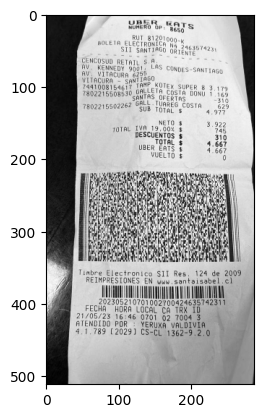

In [27]:
#   gray: The input image that you want to resize (grayscale image).

#   None: This parameter specifies the output shape of the resized image.
#         When set to None, the function calculates the output shape based on the other parameters (fx, fy).

#   fx: The scale factor along the horizontal axis. It determines how much the image width will be increased or decreased.
#       A value greater than 1 increases the width, while a value less than 1 decreases the width.

#   fy: The scale factor along the vertical axis. It determines how much the image height will be increased or decreased.
#       A value greater than 1 increases the height, while a value less than 1 decreases the height.

#   interpolation: The interpolation method to be used during resizing. It specifies how pixel values are estimated
#                  when resizing an image
increase = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(increase, cmap='gray')
plt.show()

decrease = cv2.resize(gray, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
plt.imshow(decrease, cmap='gray')
plt.show()

## Morphological operations
Erosin and dilation

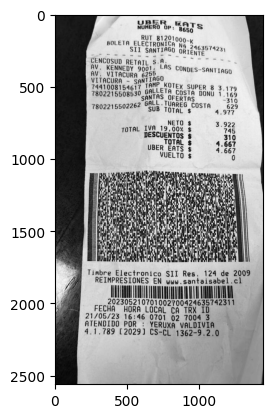

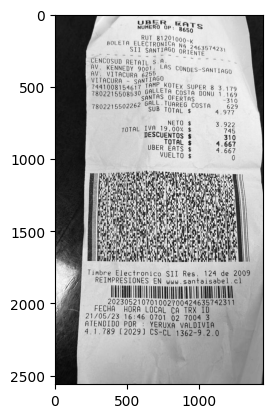

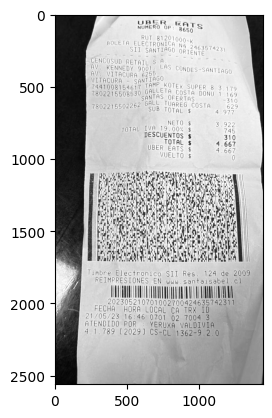

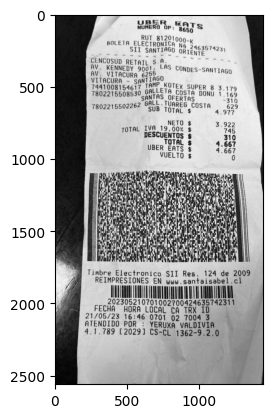

In [42]:
# Erosion: make the letters menos gruesas
erosion = cv2.erode(increase, np.ones((3,3), np.uint8))
plt.imshow(erosion, cmap='gray')
plt.show()

# Erosion + opening: for noise around the letters
opening = cv2.dilate(erosion, np.ones((3,3), np.uint8))
plt.imshow(opening, cmap='gray')
plt.show()

# Dilation: make the letters gruesas
delation = cv2.dilate(increase, np.ones((3,3), np.uint8))
plt.imshow(delation, cmap='gray')
plt.show()

# Closing : for noise in the letters
closing = cv2.erode(delation, np.ones((5,5), np.uint8))
plt.imshow(closing, cmap='gray')
plt.show()


## Noise removal


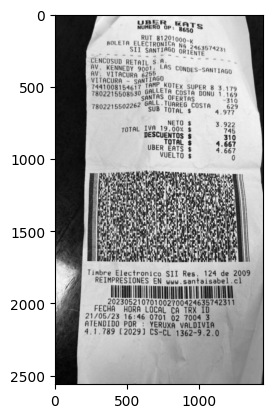

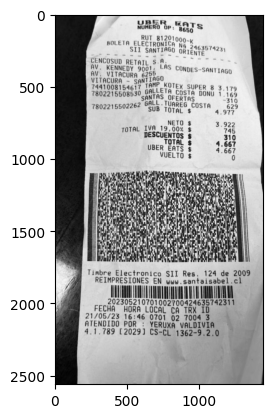

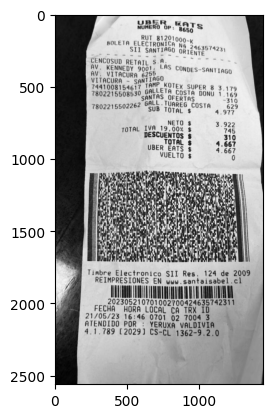

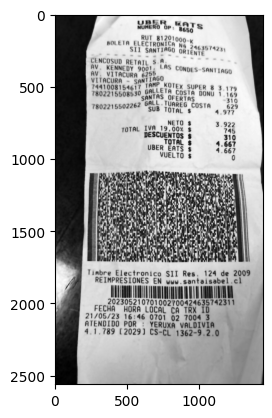

In [65]:
nr_img = closing.copy()

# Average blur
average_blur = cv2.blur(nr_img, (5, 5))
plt.imshow(average_blur, cmap='gray')
plt.show()

# Guassian blur
gaussian_blur = cv2.GaussianBlur(nr_img, (5, 5), 0)
plt.imshow(gaussian_blur, cmap='gray')
plt.show()

# Median blur
median_blur = cv2.medianBlur(nr_img, 5)
plt.imshow(median_blur, cmap='gray')
plt.show()

# Bilateral filter
bilateral_filter = cv2.bilateralFilter(erosion, 15, 80, 80)
plt.imshow(bilateral_filter, cmap='gray')
plt.show()




## Applying OCR

In [66]:
import pytesseract

from pprint import pprint
from pytesseract import Output

pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'
os.environ['TESSDATA_PREFIX'] = '/usr/local/Cellar/tesseract-lang/4.1.0/share/tessdata'


custom_config = r'--tessdata-dir "/usr/local/Cellar/tesseract-lang/4.1.0/share/tessdata"'
text = pytesseract.image_to_string(bilateral_filter, lang='spa', output_type=Output.DICT)
pprint(text)

{'text': 'BER :\n'
         '\n'
         'NUMERO Op 52 J Í\n'
         '\n'
         'BOLEIF CTRON A Ná\n'
         'SII SANTIAGO ORIENTE 11424,\n'
         '\n'
         'É\n'
         '\n'
         'CENCOSUD RETAIL SA\n'
         'AV. KENNEDY 9001. LAS CONDES -SANT AGO\n'
         'AY. VITACURA 6292 ,p\n'
         'VITACURA SA\n'
         '1441000 1546 DL Ta EX me Domo?\n'
         '\n'
         'OSTA DONU 1\n'
         '1802215508530 ANTAS OrERtAS\n'
         '\n'
         "' GALL. TUAREG Cost\n"
         '1802215502262 SUB TOTAL $ salda\n'
         '\n'
         'NETO $ 3.922\n'
         '\n'
         'TOTAL IVA 19,00% $ 745\n'
         '\n'
         'ma: TE:\n'
         '\n'
         '£ 4.667\n'
         '\n'
         'UBER EATS $ 4er\n'
         'VUELTO $\n'
         '\n'
         'Timbre Electronico SII Res. 124 de 2009\n'
         'REIMPRESIONES EN www.santaisabel.cl\n'
         '\n'
         'M0\n'
         '\n'
         '10701002700424635742311\n'
         'FECHA HORA LOCAL 